In [87]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,normaltest,mannwhitneyu,f_oneway


In [21]:
exams = pd.read_csv(r'..\data\raw\exams.csv')

In [22]:
df = exams.copy()

In [23]:
df.shape

(1000, 8)

In [24]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
907,male,group D,high school,standard,completed,70,72,67
987,female,group D,master's degree,standard,completed,87,95,100
974,female,group B,bachelor's degree,standard,completed,80,93,99
947,female,group C,associate's degree,standard,none,65,85,80
116,female,group E,high school,standard,none,90,96,88


In [28]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
for col in df.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========gender===========
Numero de unicos: 2
Valores Unicos: ['female' 'male']


===========race/ethnicity===========
Numero de unicos: 5
Valores Unicos: ['group D' 'group B' 'group C' 'group E' 'group A']


===========parental level of education===========
Numero de unicos: 6
Valores Unicos: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']


===========lunch===========
Numero de unicos: 2
Valores Unicos: ['standard' 'free/reduced']


===========test preparation course===========
Numero de unicos: 2
Valores Unicos: ['completed' 'none']


===========math score===========
Numero de unicos: 79
Valores Unicos: [ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]

In [39]:
df.drop(columns='race/ethnicity',inplace=True)

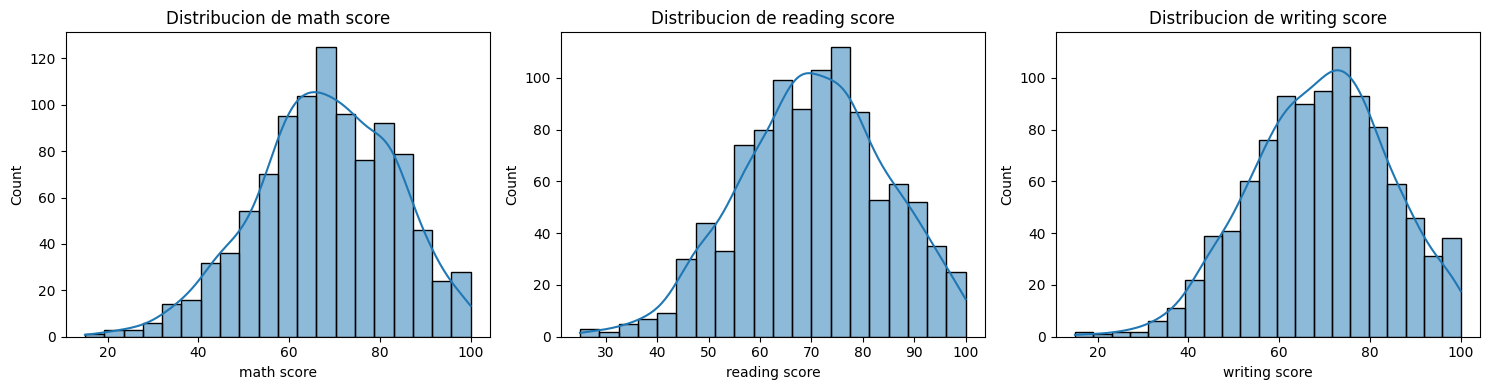

In [44]:
num_vars = df.select_dtypes('int').columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for ax, col in zip(axes, num_vars):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribucion de {col}')

plt.tight_layout()
plt.show()

In [62]:
for col in num_vars:
    print(f"\n Variable: {col}")
    
    for test_name, test_func in [('Shapiro-Wilk', shapiro), ('D’Agostino-Pearson', normaltest)]:
        stat, p = test_func(df[col])
        conclusion = "Es normal" if p > 0.05 else "No es normal"
        print(f"{test_name}: Estadístico = {stat:.4f}, p = {p:.4f} → {conclusion}")



 Variable: math score
Shapiro-Wilk: Estadístico = 0.9920, p = 0.0000 → No es normal
D’Agostino-Pearson: Estadístico = 13.5140, p = 0.0012 → No es normal

 Variable: reading score
Shapiro-Wilk: Estadístico = 0.9933, p = 0.0002 → No es normal
D’Agostino-Pearson: Estadístico = 9.2175, p = 0.0100 → No es normal

 Variable: writing score
Shapiro-Wilk: Estadístico = 0.9931, p = 0.0001 → No es normal
D’Agostino-Pearson: Estadístico = 9.0664, p = 0.0107 → No es normal


### Aunque visualmente parecían normales, los tests estadísticos (Shapiro-Wilk y D’Agostino-Pearson) rechazan la hipótesis de normalidad en los tres casos.

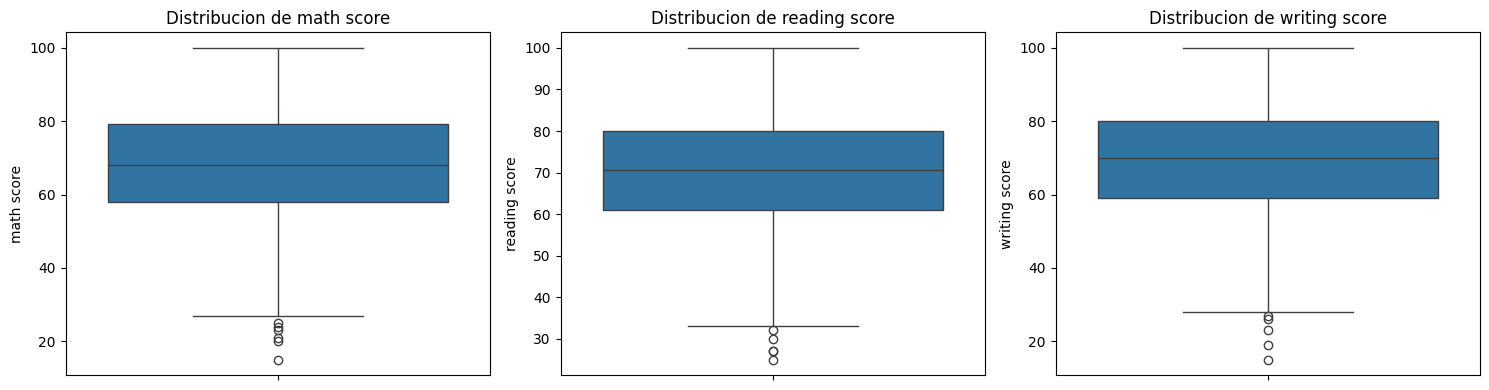

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for ax, col in zip(axes, num_vars):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Distribucion de {col}')

plt.tight_layout()
plt.show()

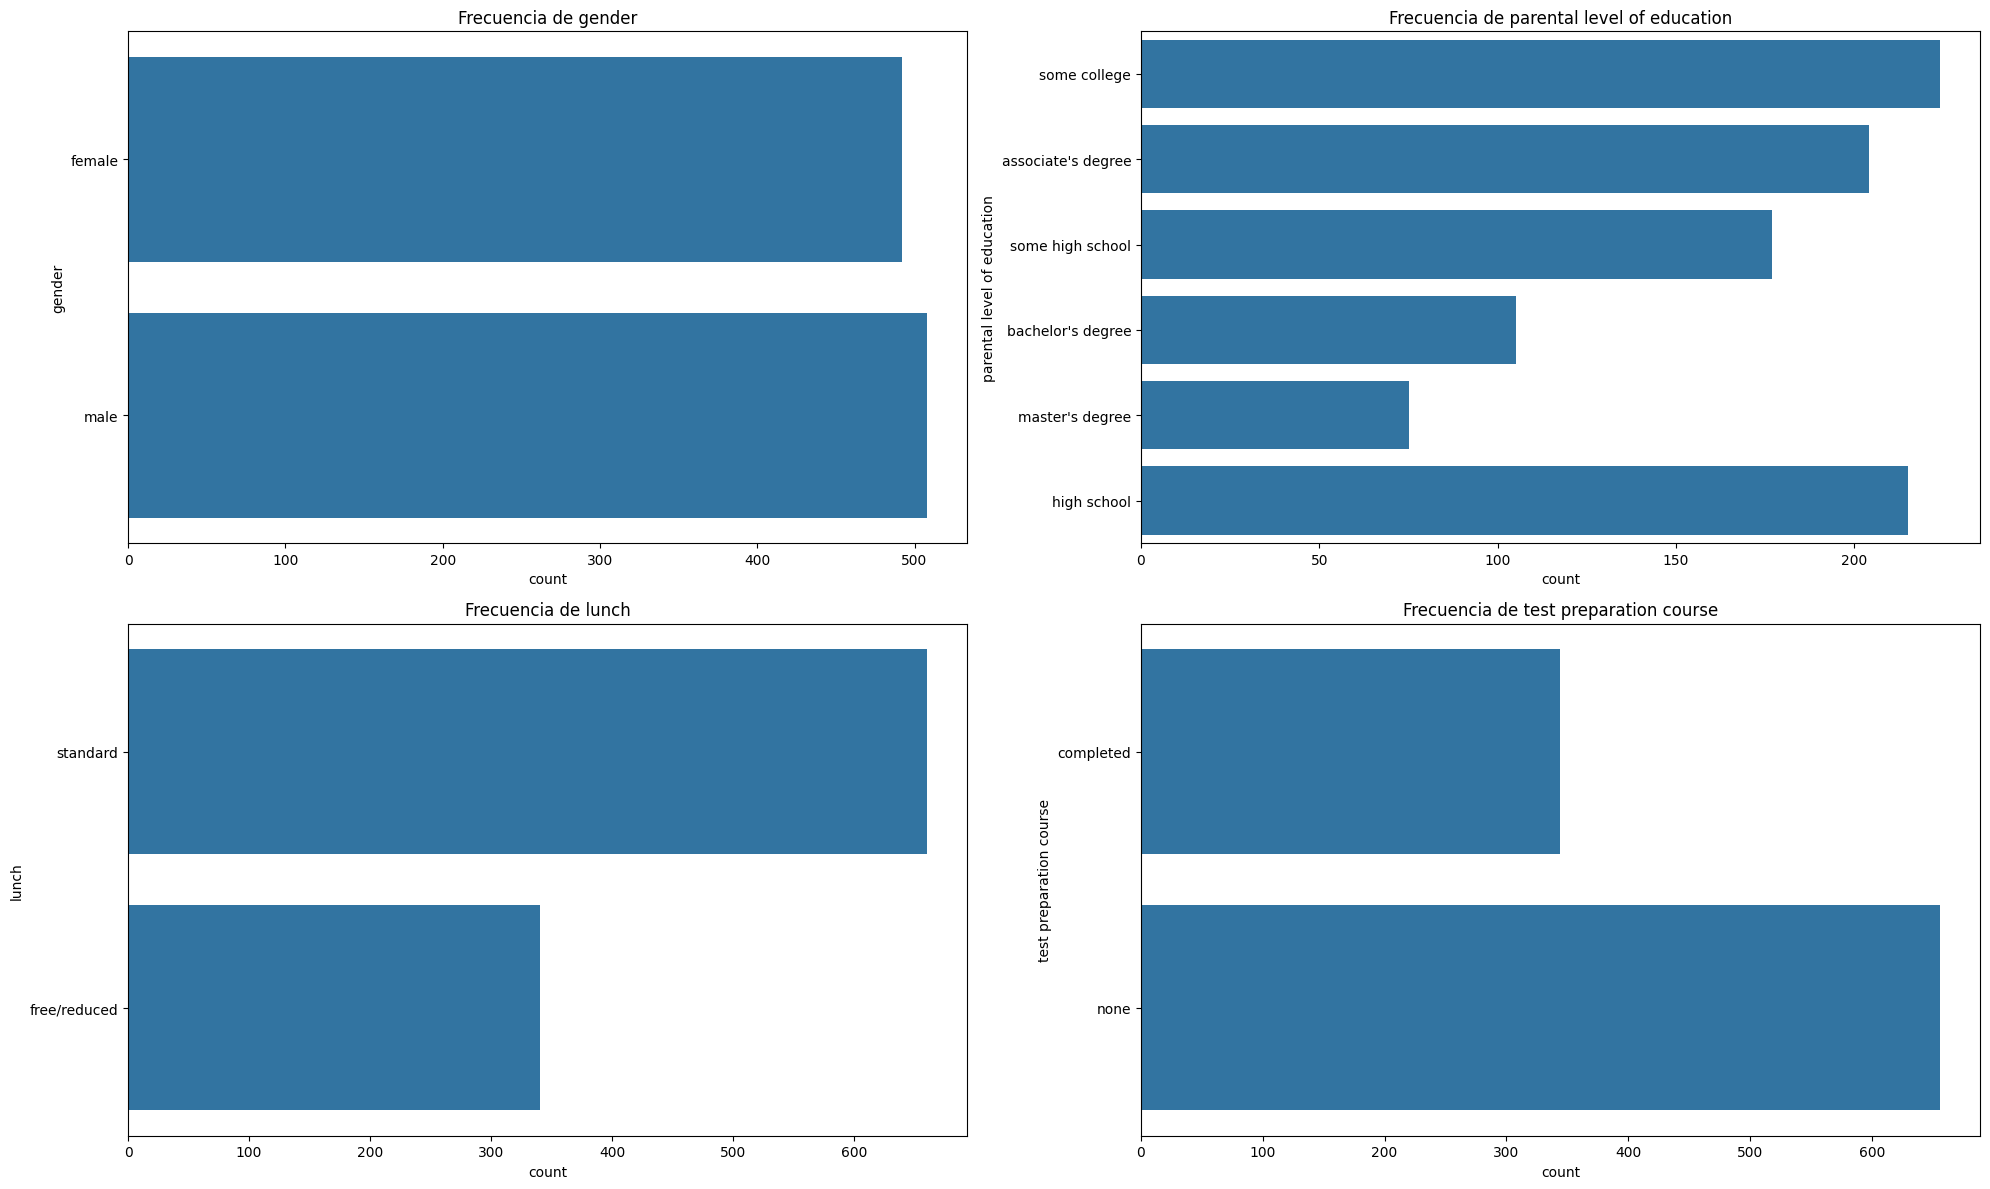

In [54]:
col_obj = df.select_dtypes('object').columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5 * len(col_obj), 12))
axes = axes.flatten()

for ax, col in zip(axes, col_obj):
    sns.countplot(df[col], ax=ax)
    ax.set_title(f'Frecuencia de {col}')

# Ajusta el diseño
plt.tight_layout()
plt.show()

1. Género (gender)
La distribución está bastante equilibrada entre hombres y mujeres, con ligera mayoría de hombres. Esto significa que no habrá sesgo importante de género en el análisis de rendimiento.

2. Nivel educativo de los padres (parental level of education)
La mayoría tiene “some college” o “high school”, lo que sugiere un nivel educativo medio predominante. Pocos estudiantes tienen padres con máster, lo cual puede ser relevante si encuentras que el rendimiento mejora con mayor nivel educativo.

3. Tipo de almuerzo (lunch)
La mayoría accede a almuerzo estándar, pero hay una proporción importante (casi 1 de cada 3) con almuerzo reducido/gratuito.

4. Curso de preparación (test preparation course)
Más estudiantes no han completado el curso de preparación que los que sí lo han hecho. Es interesante para análisis bivariantes: ¿tienen mejores notas los que hicieron el curso?

In [77]:
for col in num_vars:
    grupo1 = df[df['test preparation course'] == 'completed'][col]
    grupo2 = df[df['test preparation course'] == 'none'][col]

    stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f'Mann-Whitney U Test para {col} → Estadístico: {stat:.4f}, p = {p:.4f}')

    if p < 0.05:
        print(f"En {col} hay diferencia significativa entre los grupos")
    else:
        print(f"En {col} no hay diferencia significativa")
    print("\n")

Mann-Whitney U Test para math score → Estadístico: 127922.5000, p = 0.0005
En math score hay diferencia significativa entre los grupos


Mann-Whitney U Test para reading score → Estadístico: 142186.5000, p = 0.0000
En reading score hay diferencia significativa entre los grupos


Mann-Whitney U Test para writing score → Estadístico: 155152.0000, p = 0.0000
En writing score hay diferencia significativa entre los grupos




### Los estudiantes que completaron el curso de preparación obtienen notas significativamente distintas (más altas o más bajas) en las 3 materias que los que no lo hicieron. Como el valor p = 0.0005 (< 0.05), la diferencia es estadísticamente significativa.

In [80]:
print(df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean())

                         math score  reading score  writing score
test preparation course                                          
completed                 70.334302      74.726744      75.808140
none                      66.486280      68.103659      65.643293


### Vemos que los que han completado el curso tiene 4 puntos mas de media en matematicas, 6 puntos mas de media en reading y 10 mas en writing.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for ax, col in zip(axes,col_obj):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Distribucion de {col}')

plt.tight_layout()
plt.show()

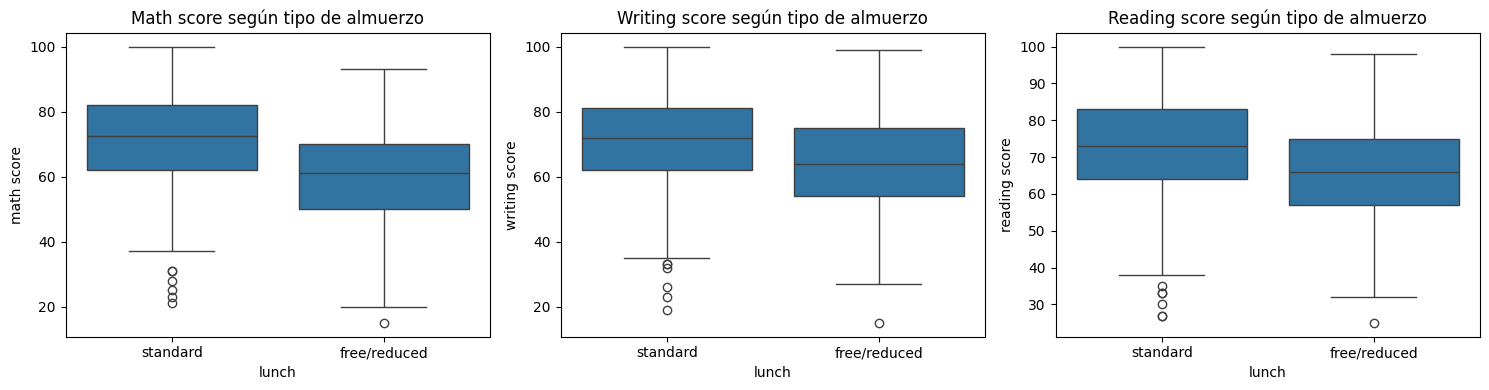

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

variables = ['math score', 'writing score', 'reading score']
titulos = ['Math score según tipo de almuerzo', 
           'Writing score según tipo de almuerzo', 
           'Reading score según tipo de almuerzo']

for ax, var, titulo in zip(axes, variables, titulos):
    sns.boxplot(x='lunch', y=var, data=df, ax=ax)
    ax.set_title(titulo)
plt.tight_layout()
plt.show()

### Los estudiantes que reciben almuerzo estándar tienden a obtener notas más altas en math, writing y reading que aquellos con almuerzo gratuito/reducido.

In [86]:
print(df.groupby('parental level of education')[['math score', 'writing score', 'reading score']].mean())

                             math score  writing score  reading score
parental level of education                                          
associate's degree            70.348039      72.039216      72.647059
bachelor's degree             69.866667      72.266667      71.819048
high school                   65.381395      66.772093      69.223256
master's degree               71.026667      71.746667      71.973333
some college                  68.642857      69.473214      70.941964
some high school              64.197740      65.293785      66.943503


In [89]:
for col in variables:
    grupo = [df[df['parental level of education'] == nivel][col] for nivel in df['parental level of education'].unique()]
    stat, p = f_oneway(*grupo)

    print(f'ANOVA → Estadístico {col}: {stat:.4f}, p = {p:.4f}')


ANOVA → Estadístico math score: 5.5113, p = 0.0001
ANOVA → Estadístico writing score: 6.4609, p = 0.0000
ANOVA → Estadístico reading score: 3.9828, p = 0.0014


### Hay diferencias estadísticamente significativas en las notas de math, writing y reading según el nivel educativo de los padres (p < 0.05 en los tres casos). Esto significa que el nivel de estudios de los padres tiene un impacto real en el rendimiento académico de los estudiantes.

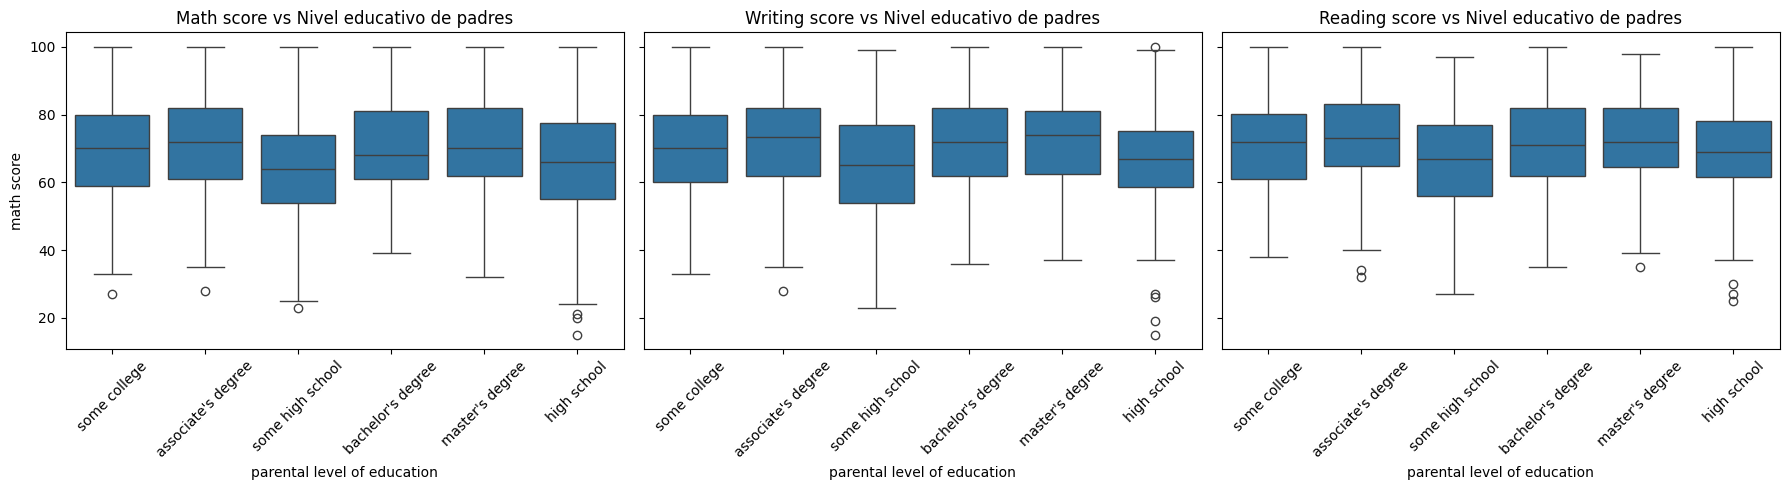

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

variables = ['math score', 'writing score', 'reading score']
titulos = ['Math score vs Nivel educativo de padres', 
           'Writing score vs Nivel educativo de padres', 
           'Reading score vs Nivel educativo de padres']

for ax, var, titulo in zip(axes, variables, titulos):
    sns.boxplot(x='parental level of education', y=var, data=df, ax=ax)
    ax.set_title(titulo)
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### Tras analizar el rendimiento académico de los estudiantes en matemáticas, lectura y escritura, observamos que existen diferencias relevantes asociadas a variables socioeducativas.

- En primer lugar, los estudiantes que completaron el curso de preparación obtuvieron, en promedio, mejores resultados en matemáticas que aquellos que no lo hicieron. Esta diferencia es estadísticamente significativa, lo que sugiere que este tipo de intervención formativa tiene un impacto real en el desempeño.

- También se evidencian brechas de rendimiento asociadas al tipo de almuerzo: los alumnos con almuerzo estándar (posible indicador de un nivel socioeconómico más favorable) muestran puntuaciones más altas en las tres materias, en comparación con quienes reciben almuerzo gratuito o reducido.

- Por último, el nivel educativo de los padres aparece como un factor importante. Los resultados del test ANOVA indican diferencias significativas en las notas medias de los estudiantes según el nivel de estudios alcanzado por sus padres, lo que refuerza la idea de que el entorno familiar y educativo influye en el rendimiento académico.

In [96]:
df.to_csv('../data/processed/exams_clean.csv')